In [1]:
!pip install pandas matplotlib scikit-learn seaborn

In [2]:
import pandas as pd

df = pd.read_csv('data/CO2 Emissions_Canada.csv')
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [3]:
import pandas as pd
import numpy as np

def one_hot_to_single_column(df, columns):
    """
    Convert categorical variables to one-hot encoded single columns.
    Each category will be represented as a single column with integer values.
    
    Parameters:
    df (pandas.DataFrame): Input DataFrame
    columns (list): List of column names to encode
    
    Returns:
    pandas.DataFrame: DataFrame with encoded columns
    """
    result_df = df.copy()
    
    for col in columns:
        # Create dummy variables
        dummies = pd.get_dummies(df[col], prefix=col)
        
        # Create a single column with integer values
        encoded_col = np.zeros(len(df))
        for i, dummy_col in enumerate(dummies.columns, 1):
            encoded_col += i * dummies[dummy_col]
            
        # Add the encoded column to the result DataFrame
        result_df[f'{col}_encoded'] = encoded_col.astype(int)
        
        # Drop the original column
        result_df = result_df.drop(columns=[col])
    
    return result_df

# Example usage:
columns_to_encode = ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']
df_encoded = one_hot_to_single_column(df, columns_to_encode)
df_encoded

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Make_encoded,Model_encoded,Vehicle Class_encoded,Transmission_encoded,Fuel Type_encoded
0,2.0,4,9.9,6.7,8.5,33,196,1,1058,1,15,5
1,2.4,4,11.2,7.7,9.6,29,221,1,1058,1,26,5
2,1.5,4,6.0,5.8,5.9,48,136,1,1059,1,23,5
3,3.5,6,12.7,9.1,11.1,25,255,1,1234,12,16,5
4,3.5,6,12.1,8.7,10.6,27,244,1,1500,12,16,5
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,2.0,4,10.7,7.7,9.4,30,219,42,1952,12,18,5
7381,2.0,4,11.2,8.3,9.9,29,232,42,1958,12,18,5
7382,2.0,4,11.7,8.6,10.3,27,240,42,1961,12,18,5
7383,2.0,4,11.2,8.3,9.9,29,232,42,1969,13,18,5


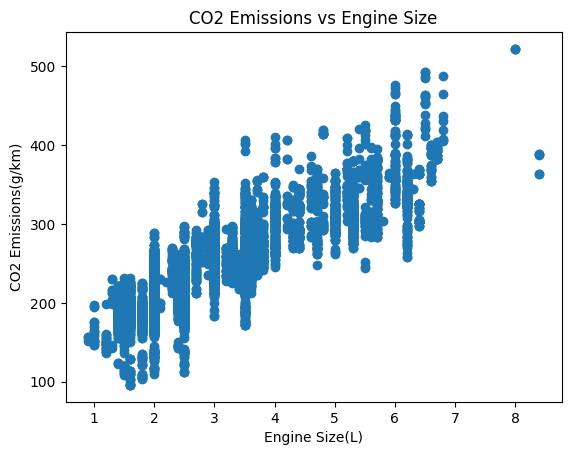

In [4]:
#scatter plot of data

import matplotlib.pyplot as plt
plt.scatter(df['Engine Size(L)'], df['CO2 Emissions(g/km)'])
plt.xlabel('Engine Size(L)')
plt.ylabel('CO2 Emissions(g/km)')
plt.title('CO2 Emissions vs Engine Size')
plt.show()

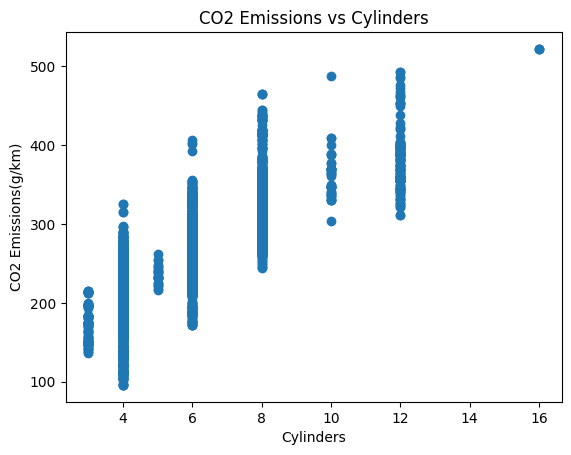

In [5]:
# plot cylinder vs CO2 emissions
plt.scatter(df['Cylinders'], df['CO2 Emissions(g/km)'])
plt.xlabel('Cylinders')
plt.ylabel('CO2 Emissions(g/km)')
plt.title('CO2 Emissions vs Cylinders')
plt.show()

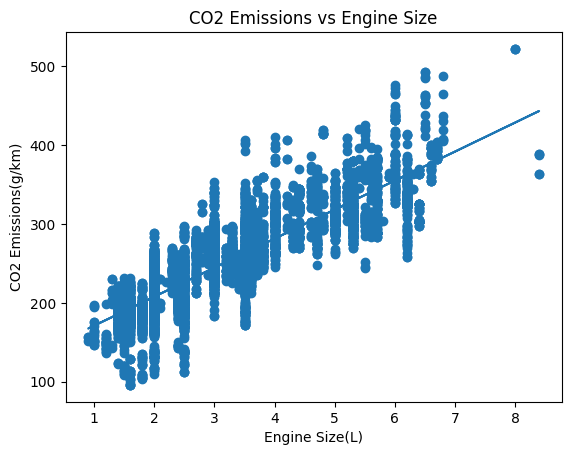

In [6]:
# make a linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(df[['Engine Size(L)']], df['CO2 Emissions(g/km)'])

# plot the model
plt.scatter(df['Engine Size(L)'], df['CO2 Emissions(g/km)'])
plt.plot(df['Engine Size(L)'], model.predict(df[['Engine Size(L)']]))
plt.xlabel('Engine Size(L)')
plt.ylabel('CO2 Emissions(g/km)')
plt.title('CO2 Emissions vs Engine Size')
plt.show()

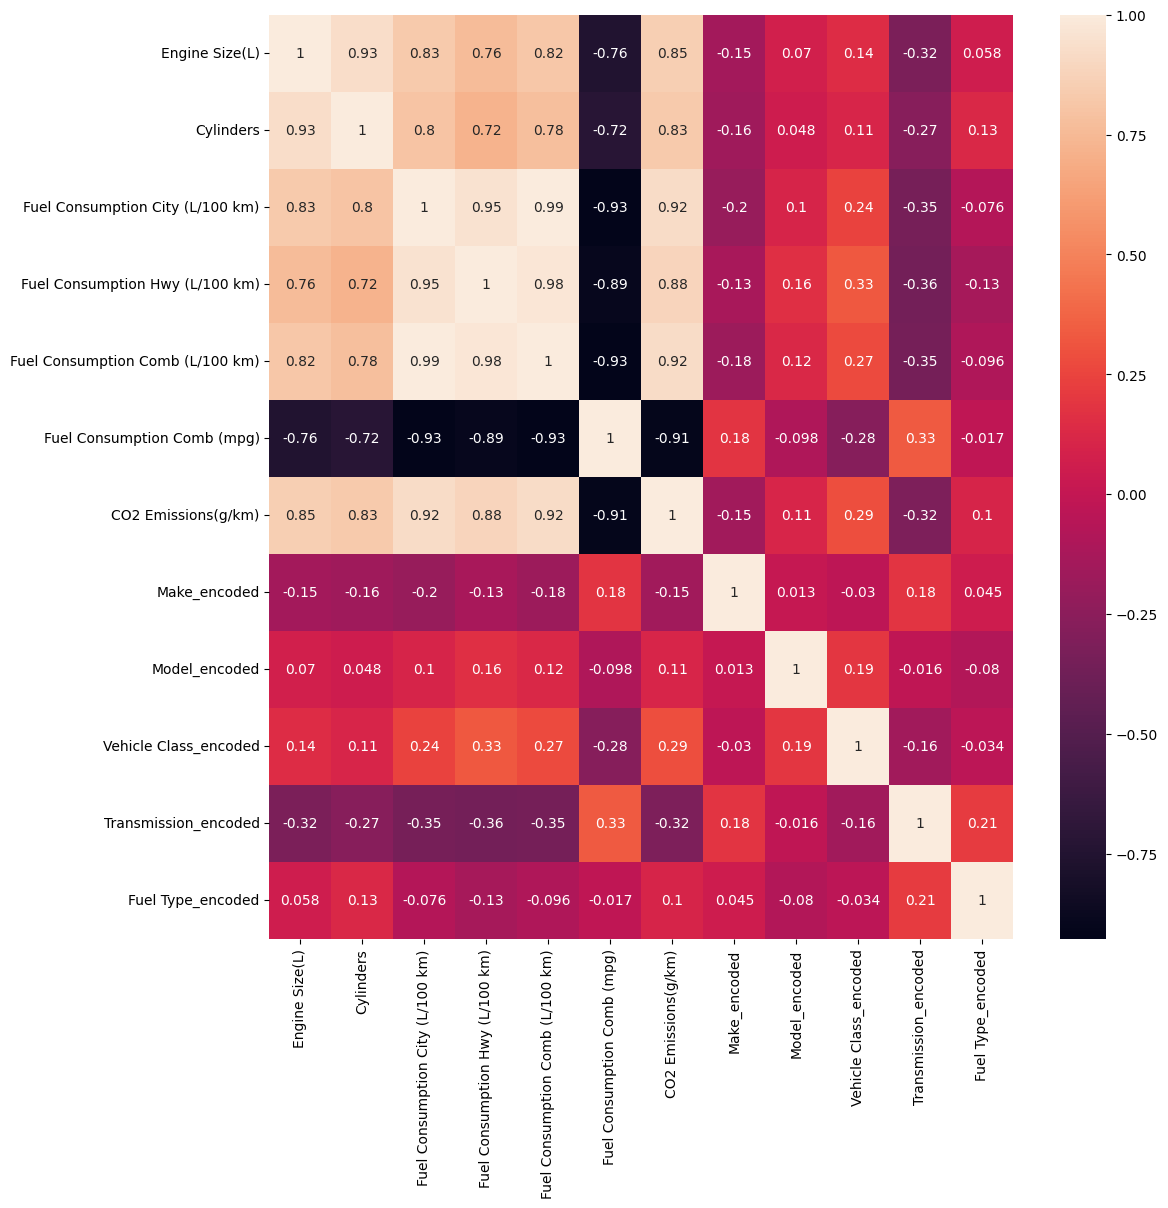

In [7]:
# plot correlation matrix

import seaborn as sns
plt.figure(figsize=(12, 12))
sns.heatmap(df_encoded.corr(), annot=True)
plt.show()

In [ ]:
!pip install xgboost

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df_encoded.drop(columns=['CO2 Emissions(g/km)'])

# only keep Cylinders and Fuel Consumption Comb (L/100 km)
X = X[['Cylinders', 'Fuel Consumption Comb (L/100 km)']]
y = df_encoded['CO2 Emissions(g/km)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# make a linear regression model

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = model.score(X_test, y_test)
print(f'R^2: {r2}')
print(f'Mean Squared Error: {mse}')

R^2: 0.8758531964517631
Mean Squared Error: 427.0187489112288


In [11]:
# make a random forest model

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = model.score(X_test, y_test)
print(f'R^2: {r2}')
print(f'Mean Squared Error: {mse}')

R^2: 0.9480108188972353
Mean Squared Error: 178.8234125802203


In [12]:
# make a xgboost model

from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = model.score(X_test, y_test)
print(f'R^2: {r2}')
print(f'Mean Squared Error: {mse}')

R^2: 0.9476924538612366
Mean Squared Error: 179.9185028076172


In [13]:
# export xgboost model to joblib

import joblib

joblib.dump(model, 'model.joblib')

['model.joblib']

In [14]:
# export to pickle

import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)
